In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import math
import numpy as np
import pandas as pd
import scipy
import scipy.integrate
from scipy.stats import norm
import matplotlib.pyplot as plt

#Load Data

In [ ]:
azimuth_neg90 = pd.read_csv("/content/drive/Shared drives/E205 /Lab1/E205_Lab_01_data/lab1_azimuth_-90.csv")
azimuth_0 = pd.read_csv("/content/drive/Shared drives/E205 /Lab1/E205_Lab_01_data/lab1_azimuth_00.csv")
azimuth_90 = pd.read_csv("/content/drive/Shared drives/E205 /Lab1/E205_Lab_01_data/lab1_azimuth_90.csv")
police_df = pd.read_csv("/content/drive/Shared drives/E205 /Lab1/police_killings.csv")

In [ ]:
azimuth_neg90.head()

,Range(m),Elevation(degrees),Azimuth(degrees),Reflectivity,Time Stamp(s),Latitude,Longitude,Time Stamp(s).1
0,9.272,1.0,269.588125,21.0,2453.166531,34.106412,-117.712031,2453.257143
1,9.276,1.0,269.783125,21.0,2453.166531,34.106412,-117.712031,2453.257143
2,9.278,1.0,270.138125,19.0,2454.266701,34.106412,-117.712031,2454.344943
3,9.280,1.0,270.333125,22.0,2454.266701,34.106412,-117.712031,2454.344943
4,9.266,1.0,269.888333,19.0,2454.566627,34.106412,-117.712031,2454.643000


# Create Histograms

Text(0.5, 1.0, 'Range Histogram (for Azimuth = -90 degrees)')

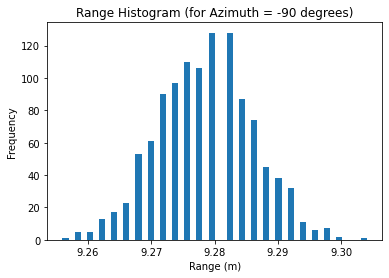

In [ ]:
plt.hist(azimuth_neg90['Range(m)'], bins=50)
plt.ylabel('Frequency')
plt.xlabel('Range (m)')
plt.title('Range Histogram (for Azimuth = -90 degrees)')

In [ ]:
# azimuth_neg90['Range(m)']
filt = police_df[police_df['Victim\'s age'].notnull()]
filt = filt[filt["Victim's age"] != 'Unknown']
filt = filt[filt["Victim's age"] != '40s']
# isEE = police_df["Victim's age"]
police_df = pd.read_csv("/content/drive/Shared drives/E205 /Lab1/police_killings.csv")
# filt = police_df[police_df["Victim's age"].map(lambda x: isinstance(x,int))]
filt.sort_values(by='Victim\'s age')
filt.head()
# filt.astype({'Victim\'s age': 'int32'})
# filt["Victim's age"] = filt["Victim's age"].apply(int                                                  
# filt.head()
# plt.hist(filt['Victim\'s age'], bins=5)
# plt.xticks(np.arange(0, 100, step=5))

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,County,Agency responsible for death,Cause of death,A brief description of the circumstances surrounding the death,Official disposition of death (justified or other),Criminal Charges?,Link to news article or photo of official document,Symptoms of mental illness?,Unarmed,Alleged Weapon (Source: WaPo),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),ID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,Eric M. Tellez,28,Male,White,https://fatalencounters.org/wp-content/uploads...,31/12/2019,Broad St.,Globe,AZ,85501.0,Gila,Globe Police Department,Gunshot,"After midnight, a patrol officer was on routin...",Pending investigation,No known charges,https://www.azfamily.com/news/phoenix-man-arme...,No,Allegedly Armed,knife,other,not fleeing,no,5332.0,NaN,Rural,7664.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Terry Hudson,57,Male,Black,NaN,31/12/2019,3600 N 24th St,Omaha,NE,68110.0,Douglas,Omaha Police Department,Gunshot,Police responded to a domestic incident on the...,Pending investigation,No known charges,https://www.ketv.com/article/omaha-police-offi...,No,Allegedly Armed,gun,attack,not fleeing,no,5359.0,NaN,Urban,7661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Malik Williams,23,Male,Black,NaN,31/12/2019,30800 14th Avenue South,Federal Way,WA,98003.0,King,Federal Way Police Department,Gunshot,Police responded to a domestic dispute. Police...,Pending investigation,No known charges,https://www.king5.com/article/news/local/2-fed...,No,Allegedly Armed,gun,attack,not fleeing,no,5358.0,NaN,Suburban,7662.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Frederick Perkins,37,Male,Black,NaN,31/12/2019,17057 N Outer 40 Rd,Chesterfield,MO,63005.0,St. Louis,Chesterfield Police Department,Gunshot,Police went to Chesterfield Outlets about 1 p....,Pending investigation,No known charges,https://www.stltoday.com/news/local/crime-and-...,No,Vehicle,vehicle,attack,car,no,5333.0,NaN,Suburban,7667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Michael Vincent Davis,49,Male,White,NaN,31/12/2019,Dawn Street,Cross Lanes,WV,25313.0,Kanawha,Kanawha County Sheriff's Department,Gunshot,Deputies responded to a disturbance on Dawn St...,Pending investigation,No known charges,https://www.wsaz.com/content/news/Shooting-rep...,No,Allegedly Armed,gun,attack,Foot,No,5374.0,NaN,Suburban,7663.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Range Histogram (for Azimuth = 0 degrees)')

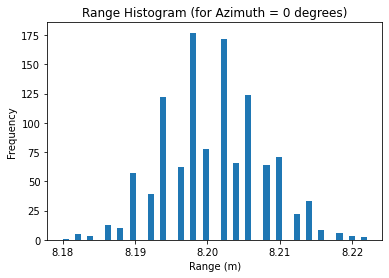

In [ ]:
plt.hist(azimuth_0['Range(m)'], bins=50)
plt.ylabel('Frequency')
plt.xlabel('Range (m)')
plt.title('Range Histogram (for Azimuth = 0 degrees)')

Text(0.5, 1.0, 'Range Histogram (for Azimuth = 0 degrees)')

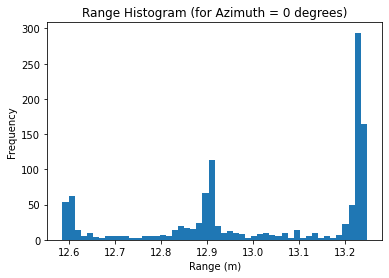

In [ ]:
plt.hist(azimuth_90['Range(m)'], bins=50)
plt.ylabel('Frequency')
plt.xlabel('Range (m)')
plt.title('Range Histogram (for Azimuth = 0 degrees)')

#Create a Model

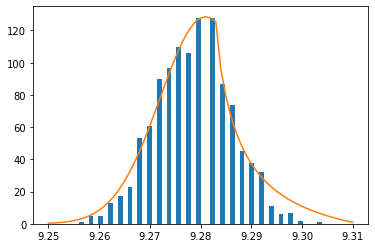

In [ ]:
#create a mathematical function that best characterizes the data 
plt.hist(azimuth_neg90['Range(m)'], bins=50)
sigma = .009
mu = 9.281
x_list = np.arange(9.25, 9.31, 0.001) 
y = []
for x in x_list:
  if (x<9.283):
    y.append(5.8/(2*np.sqrt(2*np.pi)*sigma)*np.exp(-(x-mu)**2/(2*sigma**2)))
  else:
    #y.append(np.exp(.18/(x-9.245))-15)
    y.append(.7/(x-9.278)-21)
plt.plot(x_list, y)
plt.show()

In [ ]:
a = min(azimuth_neg90['Range(m)'])
b = 9.283
c = max(azimuth_neg90['Range(m)'])
print('bounds are', a, b, c)

bounds are 9.256 9.283 9.304


In [ ]:
f1 = lambda x:5.8/(2*np.sqrt(2*np.pi)*sigma)*np.exp(-(x-mu)**2/(2*sigma**2))
f2 = lambda x:.7/(x-9.278)-21
i = scipy.integrate.quad(f1, a, b)[0] + scipy.integrate.quad(f2, b, c)[0]
print(i)

2.410120593905418


In [ ]:
f1 = lambda x:(5.8/(2*np.sqrt(2*np.pi)*sigma)*np.exp(-(x-mu)**2/(2*sigma**2)))/2.41
f2 = lambda x:(.7/(x-9.278)-21)/2.41
i = scipy.integrate.quad(f1, a, b)[0] + scipy.integrate.quad(f2, b, c)[0]
print(i)

1.0000500389649036


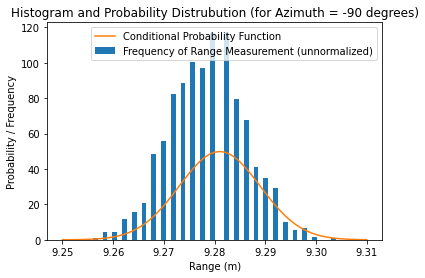

In [ ]:
#create a mathematical function that best characterizes the data 
plt.figure(figsize=(6,4))
plt.hist(azimuth_neg90['Range(m)'], density=True, bins=50)
sigma = .008
mu = 9.281
x_list = np.arange(9.25, 9.31, 0.001) 
y = []
for x in x_list:
  y.append((1/(np.sqrt(2*np.pi)*sigma))*np.exp(-(x-mu)**2/(2*sigma**2)))
plt.plot(x_list, y)
plt.title("Histogram and Probability Distrubution (for Azimuth = -90 degrees)")
plt.ylabel("Probability / Frequency")
plt.xlabel("Range (m)")
plt.legend(["Conditional Probability Function","Frequency of Range Measurement (unnormalized)"])
plt.show()

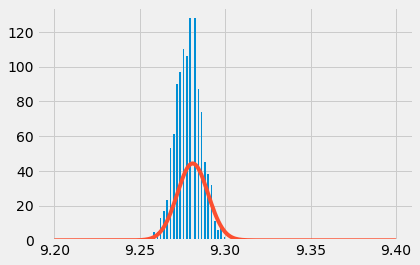

In [ ]:
plt.hist(azimuth_neg90['Range(m)'], bins=50)
sigma = .009
mu = 9.281
x_axis = np.arange(9.2, 9.4, 0.001)
plt.plot(x_axis, norm.pdf(x_axis,mu,sigma))
plt.show()

In [ ]:
f1 = lambda x:(1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x-mu)**2/(2*sigma**2)))
i = scipy.integrate.quad(f1, mu-sigma, mu+sigma)
print(i)

(0.6826894921370418, 7.579375928401985e-15)


#Transform and plot the GPS measurements

Text(0, 0.5, 'Y Position (m)')

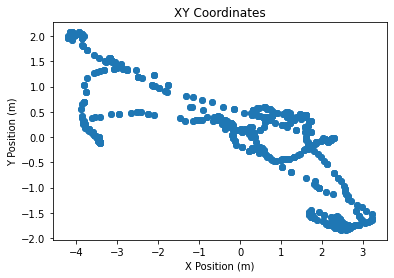

In [ ]:
# Transform the GPS longitude and latitude measurements (from the azimuth=0 file) to X and Y coordinates in meters
longitude = azimuth_0['Longitude']*np.pi/180
latitude = azimuth_0['Latitude']*np.pi/180
lon_0 = np.mean(longitude)
lat_0 = np.mean(latitude)
rad = 6371000 
x = rad*(longitude-lon_0)*np.cos(lat_0)
y = rad*(latitude-lat_0)
plt.scatter(x,y)
plt.title("XY Coordinates")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")

#Implement Bayes rule

In [ ]:
# use Bayes rule to calculate the probability of being in position states
# our prior knowledge of states is such that p(xi) = 0.25
# obtained a range measurement that is the first -90 degree azimuth range measurement
z = azimuth_neg90['Range(m)'][0]
# use Bayes rule to calculate the probability of being in position states
pos_list = [9.6, 9.7, 9.8, 9.9]
prob_list = []
for pos in pos_list:
  print(round(norm.pdf(pos,mu,sigma),100))
  print(type(norm.pdf(pos,mu,sigma)))
  p = f1(pos)*0.25
  prob_list.append(p)
print(prob_list)

0.0
<class 'numpy.float64'>
0.0
<class 'numpy.float64'>
0.0
<class 'numpy.float64'>
0.0
<class 'numpy.float64'>
[0.0, 0.0, 0.0, 0.0]


# Create Police Data Model

In [ ]:
victims_black = police_df[police_df["Victim's race"]=="Black"]
victims_white = police_df[police_df["Victim's race"]=="White"]
victims_hispanic = police_df[police_df["Victim's race"]=="Hispanic"]
victims_asian = police_df[police_df["Victim's race"]=="Asian"]

In [ ]:
# police_df = pd.read_csv("/content/drive/Shared drives/E205 /Lab1/police_killings.csv")
# filt = police_df[police_df["Victim's age"].map(lambda x: isinstance(x,int))]
def plot_age_histogram(df):
    filt = df[df['Victim\'s age'].notnull()]
    filt = filt[filt["Victim\'s age"] != 'Unknown']
    filt = filt[filt["Victim\'s age"] != '40s']
    filt["Victim\'s age"] = pd.to_numeric(filt["Victim\'s age"], errors='coerce')
    filt = filt.sort_values(by='Victim\'s age')
    return filt

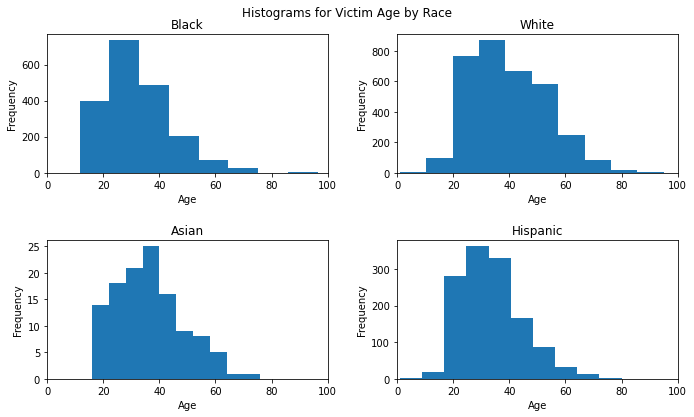

In [ ]:
plt.figure(figsize=(10,6))

plt.suptitle("Histograms for Victim Age by Race")
x_axis = np.arange(0,100,.1)

ax1 = plt.subplot(221)
filtered = plot_age_histogram(victims_black)
ax1.set_xlim(0, 100)
ax1.hist(filtered["Victim\'s age"])
ax1.set_title('Zoomed out')
ax1.set_title("Black")
ax1.set_xlabel("Age")
ax1.set_ylabel("Frequency")

ax2 = plt.subplot(222)
filtered = plot_age_histogram(victims_white)
ax2.set_xlim(0, 100)
ax2.hist(filtered["Victim\'s age"])
ax2.set_title("White")
ax2.set_xlabel("Age")
ax2.set_ylabel("Frequency")

ax3 = plt.subplot(223)
filtered = plot_age_histogram(victims_asian)
ax3.set_xlim(0, 100)
ax3.hist(filtered["Victim\'s age"])
ax3.set_title("Asian")
ax3.set_xlabel("Age")
ax3.set_ylabel("Frequency")

ax4 = plt.subplot(224)
filtered = plot_age_histogram(victims_hispanic)
ax4.set_xlim(0, 100)
ax4.hist(filtered["Victim\'s age"])
ax4.set_title("Hispanic")
ax4.set_xlabel("Age")
ax4.set_ylabel("Frequency")

plt.tight_layout(pad=2.0)
# plt.figure(figsize=(60,8))
plt.show()

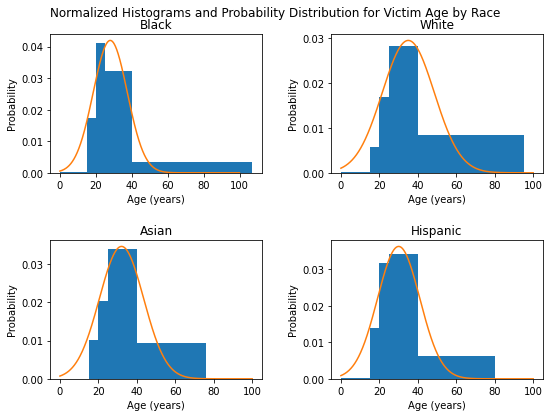

In [ ]:
plt.figure(figsize=(8,6))

plt.suptitle("Normalized Histograms and Probability Distribution for Victim Age by Race")
x_axis = np.arange(0,100,.1)

ax1 = plt.subplot(221)
filtered = plot_age_histogram(victims_black)
ax1.hist(filtered["Victim\'s age"], density=True, 
         bins = [0, 15, 20, 25, 40, max(filtered["Victim\'s age"])])
sigma = 9.5
mu = 28
ax1.plot(x_axis, norm.pdf(x_axis,mu,sigma))
ax1.set_title('Zoomed out')
ax1.set_title("Black")
ax1.set_xlabel("Age (years)")
ax1.set_ylabel("Probability")

ax2 = plt.subplot(222)
filtered = plot_age_histogram(victims_white)
ax2.hist(filtered["Victim\'s age"], density=True, 
         bins = [0, 15, 20, 25, 40, max(filtered["Victim\'s age"])])
sigma = 13.5
mu = 35
ax2.plot(x_axis, norm.pdf(x_axis,mu,sigma))
ax2.set_title("White")
ax2.set_xlabel("Age (years)")
ax2.set_ylabel("Probability")

ax3 = plt.subplot(223)
filtered = plot_age_histogram(victims_asian)
#ax3.set_xlim(0, 100)
ax3.hist(filtered["Victim\'s age"], density=True, 
         bins = [0, 15, 20, 25, 40, max(filtered["Victim\'s age"])])
sigma = 11.5
mu = 32
ax3.plot(x_axis, norm.pdf(x_axis,mu,sigma))
ax3.set_title("Asian")
ax3.set_xlabel("Age (years)")
ax3.set_ylabel("Probability")

ax4 = plt.subplot(224)
filtered = plot_age_histogram(victims_hispanic)
#ax4.set_xlim(0, 100)
ax4.hist(filtered["Victim\'s age"], density=True, 
         bins = [0, 15, 20, 25, 40, max(filtered["Victim\'s age"])])
sigma = 11
mu = 30
ax4.plot(x_axis, norm.pdf(x_axis,mu,sigma))
ax4.set_title("Hispanic")
ax4.set_xlabel("Age (years)")
ax4.set_ylabel("Probability")

plt.tight_layout(pad=2.0)
# plt.figure(figsize=(60,8))
plt.show()

(array([  0.91374269,   0.        ,   4.56871345,   0.        ,
          4.56871345,   0.        ,  11.87865497,   0.        ,
         15.53362573,   0.        ,  21.01608187,   0.        ,
         48.42836257,   0.        ,  55.73830409,   0.        ,
         82.23684211,   0.        ,  88.63304094,   0.        ,
        100.51169591,   0.        ,  96.85672515,   0.        ,
        116.95906433,   0.        ,   0.        , 116.95906433,
          0.        ,  79.49561404,   0.        ,  67.61695906,
          0.        ,  41.11842105,   0.        ,  34.72222222,
          0.        ,  29.23976608,   0.        ,  10.05116959,
          0.        ,   5.48245614,   0.        ,   6.39619883,
          0.        ,   1.82748538,   0.        ,   0.        ,
          0.        ,   0.91374269]),
 array([9.256  , 9.25696, 9.25792, 9.25888, 9.25984, 9.2608 , 9.26176,
        9.26272, 9.26368, 9.26464, 9.2656 , 9.26656, 9.26752, 9.26848,
        9.26944, 9.2704 , 9.27136, 9.27232, 9.27328,

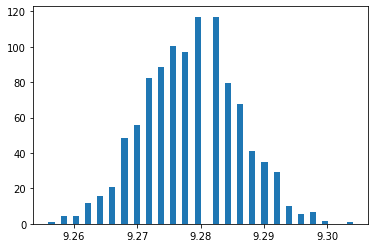

In [ ]:
plt.hist(azimuth_neg90['Range(m)'], density=True, bins=50)